In [26]:
import numpy as np
import matplotlib.pylab as plt

## 오차역전파법
수치미분의 단점
- 계산 속도가 느리다
- 오차를 가지고 있다

위 단점을 해결하기 위해 오차역전파법 사용

## 계산 그래프
- 자료구조 그래프를 사용하여 오차역전파법을 이해하기 쉬워짐

### 계산 그래프 문제2번
- (사과, 100) -> (2개, *2) -> (200원) ──> (사과+귤, 650원) -> (소비세, 10%) --> **715원**
- (귤 , 150) -> (3개, *3) -> (450원) ──┘

### 계산 그래프 역전파
- (사과, 100) <- (2개, *2) <- (??, 200원) <- (소비세, *1.1) <-- **220원**

## 연쇄 법칙
- 합성 함수 : 함수가 여러 개로 이루어진 함수

```
x와 l의 미분을 구하기 위해서는
(x or y)와 t의 미분 -> t와 z의 미분을 곱하여 알 수 있다.

x->l의 미분을 통해서 x의 증감에 따라 l의 변화를 알 수 있다.
--> w1의 변화를 통해 l의 변화를 알 수 있다.
--->  

반대로 z->t 미분, t->x의 미분

```

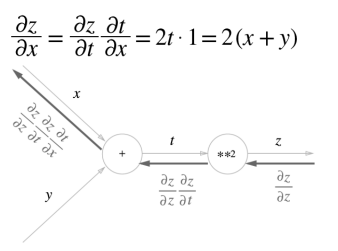

## 덧셈 노드의 역전파
- 1.3이라는 값이 오른쪽에서 왔을 때 x에 대한 z 미분을 구하면 1이 나온다
- - 1이라는 건 변화가 x값 그 자체라는 의미다

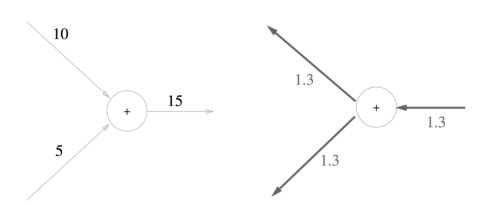

In [27]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy        

#### 순전파 ▽

In [28]:
apple = 100
apple_num = 2
tax = 1.1

In [29]:
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

In [30]:
apple_price = mul_apple_layer.forward(apple, apple_num)

In [31]:
price = mul_tax_layer.forward(apple_price, tax)

In [32]:
price

220.00000000000003

#### 역전파 ▽

In [33]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)

In [34]:
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

In [35]:
dapple_price, dtax, dapple_num, " apple에 대한 L 결과 ---> ", dapple

(1.1, 200, 110.00000000000001, ' apple에 대한 L 결과 ---> ', 2.2)

In [36]:
# 사과 가격이 1000이 됐을 때 최종 가격
apple = 1000
apple * dapple

2200.0

In [37]:
# 사과 가격이 2323원이 됐을 때 최종 가격
apple = 2323
apple * dapple

5110.6

```
활성화 함수(렐루, 시그모이드 등)도 위 곱셍과 마찬가지로 구할 수 있다.
```